# PoseMe

## Imports

In [1]:
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

## Functions

In [2]:
def rename_dir_numerically(photo_dir, ext=".jpg"):
    x = 0
    for i in os.listdir(photo_dir):
        os.rename(photo_dir + i, photo_dir + str(x) + ext)
        x += 1
        
#sorted_dir_list = [int(i.split('.')[0]) for i in dir_list]
# sorted_dir_list.sort()
# sorted_dir_list

In [3]:
def img_info(photo_dir, bins=15):
    imgs = os.listdir(photo_dir)
    imgs_format = []
    imgs_sizes = []
    imgs_mode = []
    # Open the image form working directory
    for image_name in imgs:
        image = Image.open(photo_dir + image_name)
        # summarize some details about the image
        imgs_format.append(image.format)
        imgs_sizes.append(image.size)
        imgs_mode.append(image.mode)
    # Width and Height Arrays
    imgs_heights = [img[0] for img in imgs_sizes]
    imgs_widths = [img[1] for img in imgs_sizes]
    hw_ratio = [ img[0]/img[1] for img in imgs_sizes]
    # Plots
    plt.hist(imgs_format)
    plt.title("Image Type Distribution")
    plt.show()
    plt.hist(imgs_heights, bins=bins)
    plt.title("Image Height Distribution")
    plt.show()
    plt.hist(imgs_widths, bins=bins)
    plt.title("Image Width Distribution")
    plt.show()
    plt.hist(hw_ratio, bins=bins)
    plt.title("Height to Width Distribution")
    plt.show()

In [9]:
def resize_imgs(photo_dir, output_dir, size):
    desired_size = size
    raw_imgs = os.listdir(photo_dir)
    for img_name in raw_imgs:
        im_path = photo_dir + img_name
        im = Image.open(im_path)
        old_size = im.size  # old_size[0] is in (width, height) format
        ratio = float(desired_size)/max(old_size)
        new_size = tuple([int(x*ratio) for x in old_size])
        ## use thumbnail() or resize() method to resize the input image
        ## thumbnail is a in-place operation
        ## im.thumbnail(new_size, Image.ANTIALIAS)
        im = im.resize(new_size, Image.ANTIALIAS)
        # create a new image and paste the resized on it
        new_im = Image.new("RGB", (desired_size, desired_size))
        new_im.paste(im, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))
        #new_im.show()
        new_im.save(output_dir + img_name)

## Workflow

In [5]:
# photo_dir = "D:\\kunal\poses\src\photos\\"
# rename_dir_numerically(photo_dir)

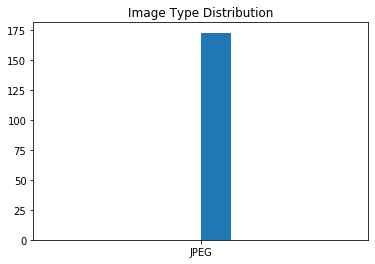

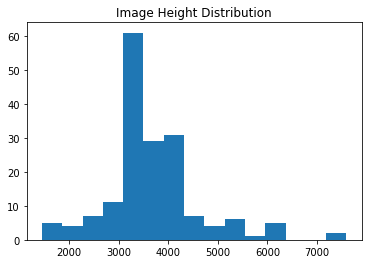

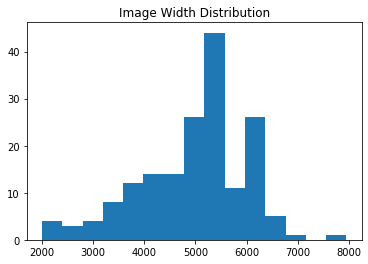

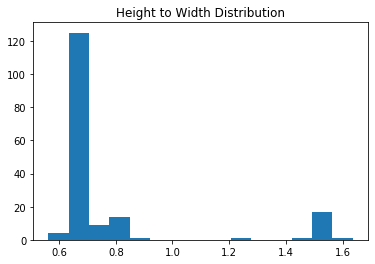

In [6]:
photo_dir = "D:\\kunal\pose_suggestion\src\photos\\"
img_info(photo_dir)

In [7]:
# show the image
#image.show()

In [ ]:
photo_dir = "D:\\kunal\pose_suggestion\src\photos\\"
output_dir = "../src/photos_resized_100/"
resize_imgs(photo_dir, output_dir, 100)